In [1]:
import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

jtplot.style(figsize=(15, 9))

In [2]:
df = pd.read_csv('../data/bt/gld_gdx_aapl_spy__1H.csv', parse_dates=True, index_col=0, header=[0, 1])
df = df['Close']
df.head()

,AAPL,GDX,GLD,SPY
Datetime,,,,
2022-10-07 14:30:00-04:00,139.721893,24.440001,157.720001,361.619995
2022-10-07 15:30:00-04:00,140.080002,24.420000,157.919998,362.799988
2022-10-10 09:30:00-04:00,140.050003,24.250000,155.869995,362.489990
2022-10-10 10:30:00-04:00,140.020004,24.195000,155.419998,360.339996
2022-10-10 11:30:00-04:00,139.747498,24.190001,155.265106,359.050110


In [3]:
df.shape

(3492, 4)

In [4]:
tickers = df.columns

In [5]:
for col in tickers:
    df[f'{col}_return'] = np.log(df[col] / df[col].shift(1))

df.dropna(inplace=True)

In [6]:
df.shape

(3489, 8)

In [7]:
cols = [ticker+'_return' for ticker in tickers]
link = linkage(df[cols], 'ward', 'euclidean')
df['clusters'] = fcluster(link, 3, criterion='maxclust')

In [8]:
df.groupby('clusters').count()[tickers]

,AAPL,GDX,GLD,SPY
clusters,,,,
1,427,427,427,427
2,90,90,90,90
3,2972,2972,2972,2972


In [9]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df[cols])

KMeans(n_clusters=3, random_state=42)

In [10]:
df['kmeans'] = model.labels_

In [11]:
df.groupby('kmeans').count()[tickers]

,AAPL,GDX,GLD,SPY
kmeans,,,,
0,524,524,524,524
1,2795,2795,2795,2795
2,170,170,170,170


In [12]:
df.head()

,AAPL,GDX,GLD,SPY,AAPL_return,GDX_return,GLD_return,SPY_return,clusters,kmeans
Datetime,,,,,,,,,,
2022-10-07 15:30:00-04:00,140.080002,24.420000,157.919998,362.799988,0.002560,-0.000819,0.001267,0.003258,3,1
2022-10-10 09:30:00-04:00,140.050003,24.250000,155.869995,362.489990,-0.000214,-0.006986,-0.013066,-0.000855,1,0
2022-10-10 10:30:00-04:00,140.020004,24.195000,155.419998,360.339996,-0.000214,-0.002271,-0.002891,-0.005949,3,1
2022-10-10 11:30:00-04:00,139.747498,24.190001,155.265106,359.050110,-0.001948,-0.000207,-0.000997,-0.003586,3,1
2022-10-10 12:30:00-04:00,139.949997,24.155001,155.350006,358.980011,0.001448,-0.001448,0.000547,-0.000195,3,1


In [13]:
df[df['clusters']==3].groupby('kmeans').count()

,AAPL,GDX,GLD,SPY,AAPL_return,GDX_return,GLD_return,SPY_return,clusters
kmeans,,,,,,,,,
0,119,119,119,119,119,119,119,119,119
1,2770,2770,2770,2770,2770,2770,2770,2770,2770
2,83,83,83,83,83,83,83,83,83


In [14]:
df.groupby('clusters').mean()

,AAPL,GDX,GLD,SPY,AAPL_return,GDX_return,GLD_return,SPY_return,kmeans
clusters,,,,,,,,,
1,174.256954,30.713780,188.188474,451.445413,-0.005483,-0.010537,-0.003517,-0.003424,0.053864
2,175.886689,31.338237,190.827489,459.427940,0.001443,0.026706,0.010516,0.003342,1.955556
3,179.673003,31.343696,191.361561,461.799657,0.000899,0.000858,0.000332,0.000543,0.987887


In [15]:
df.groupby('kmeans').mean()

,AAPL,GDX,GLD,SPY,AAPL_return,GDX_return,GLD_return,SPY_return,clusters
kmeans,,,,,,,,,
0,174.419739,30.683053,188.018774,451.220773,-0.005218,-0.009449,-0.003068,-0.003276,1.456107
1,180.008680,31.392522,191.618071,462.587872,0.000897,0.000683,0.000248,0.000568,2.982826
2,174.738138,30.992172,189.195094,454.185285,0.004042,0.020575,0.007918,0.003422,2.488235


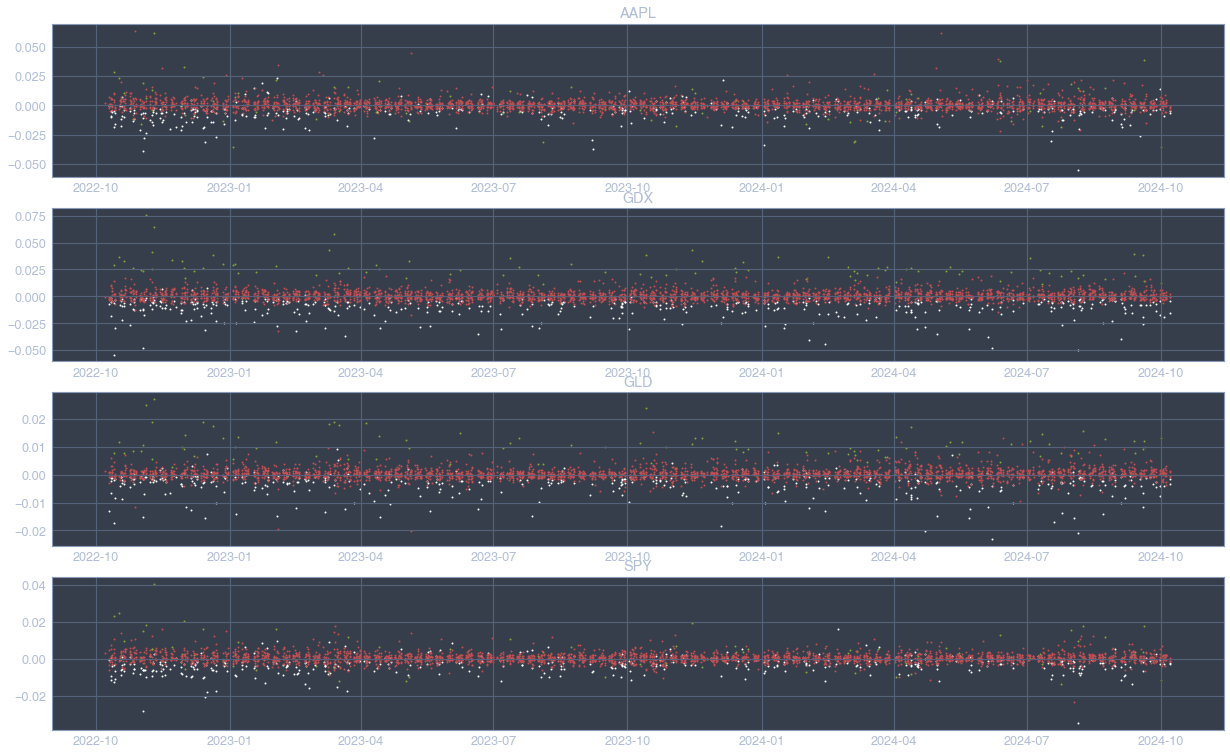

In [23]:
fig, ax = plt.subplots(4, 1, figsize=(21, 13))
for i, ticker in enumerate(tickers):
    ax[i].scatter(df[df['clusters']==1].index, df[df['clusters']==1][f'{ticker}_return'], c='w', s=3)
    ax[i].scatter(df[df['clusters']==2].index, df[df['clusters']==2][f'{ticker}_return'], c='g', s=3)
    ax[i].scatter(df[df['clusters']==3].index, df[df['clusters']==3][f'{ticker}_return'], c='r', s=3)
    ax[i].set_title(ticker)


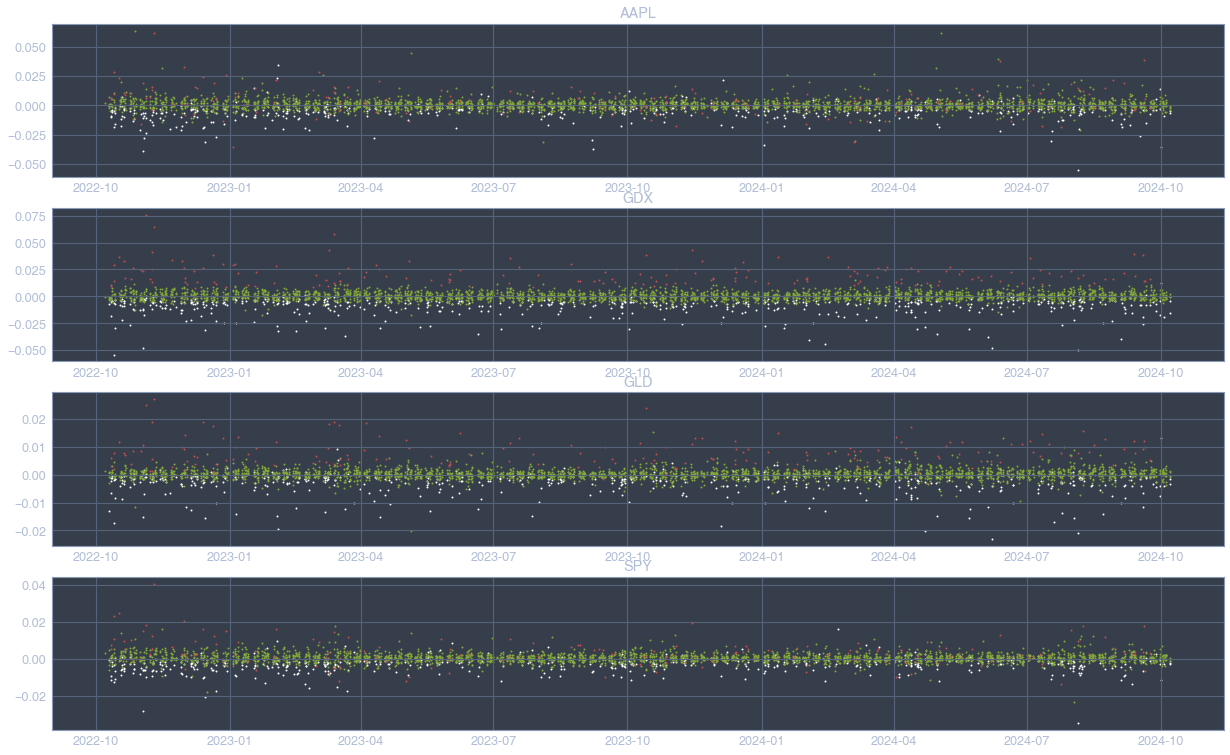

In [16]:
fig, ax = plt.subplots(4, 1, figsize=(21, 13))
for i, ticker in enumerate(tickers):
    ax[i].scatter(df[df['kmeans']==0].index, df[df['kmeans']==0][f'{ticker}_return'], c='w', s=3)
    ax[i].scatter(df[df['kmeans']==1].index, df[df['kmeans']==1][f'{ticker}_return'], c='g', s=3)
    ax[i].scatter(df[df['kmeans']==2].index, df[df['kmeans']==2][f'{ticker}_return'], c='r', s=3)
    ax[i].set_title(ticker)

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

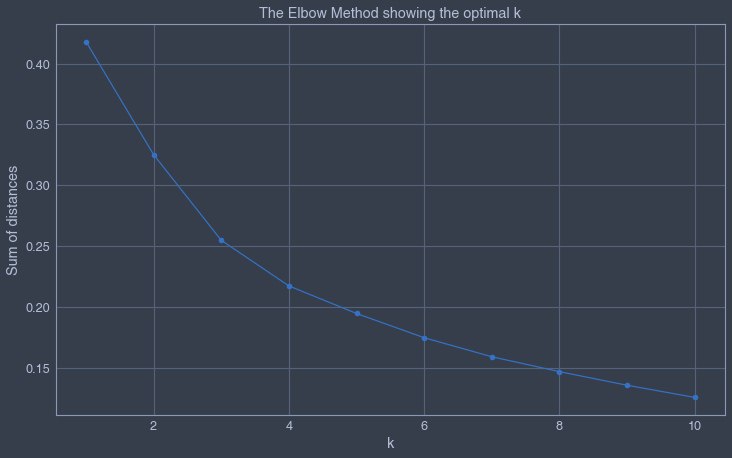

In [32]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(df[cols]) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')